In [1]:
import pandas as pd
df = pd.read_csv('../data/train.csv')
df.head()

ModuleNotFoundError: No module named 'pandas'

In [2]:
import pandas as pd
df = pd.read_csv('../data/train.csv')
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [3]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday


In [4]:
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5


In [5]:
df['datetime'] = pd.to_datetime(df['datetime'])
df['hour'] = df['datetime'].dt.hour
df['day'] = df['datetime'].dt.day
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday
df.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,day,month,weekday
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0,1,1,5
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1,1,1,5
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2,1,1,5
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3,1,1,5
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4,1,1,5


In [6]:
df = df.drop(['datetime', 'casual', 'registered'], axis=1)
df.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,count,hour,day,month,weekday
0,1,0,0,1,9.84,14.395,81,0.0,16,0,1,1,5
1,1,0,0,1,9.02,13.635,80,0.0,40,1,1,1,5
2,1,0,0,1,9.02,13.635,80,0.0,32,2,1,1,5
3,1,0,0,1,9.84,14.395,75,0.0,13,3,1,1,5
4,1,0,0,1,9.84,14.395,75,0.0,1,4,1,1,5


In [7]:
print(df.isnull().sum())


season        0
holiday       0
workingday    0
weather       0
temp          0
atemp         0
humidity      0
windspeed     0
count         0
hour          0
day           0
month         0
weekday       0
dtype: int64


In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df[['temp', 'humidity', 'windspeed']] = scaler.fit_transform(df[['temp', 'humidity', 'windspeed']])


In [9]:
from sklearn.model_selection import train_test_split

X = df.drop(['count'], axis=1)
y = df['count']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [10]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)


,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [11]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

y_pred = model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print(f"MAE: {mae}")
print(f"RMSE: {rmse}")
print(f"R² Score: {r2}")


MAE: 43.14817263544536
RMSE: 65.07287716206163
R² Score: 0.8717094080025088


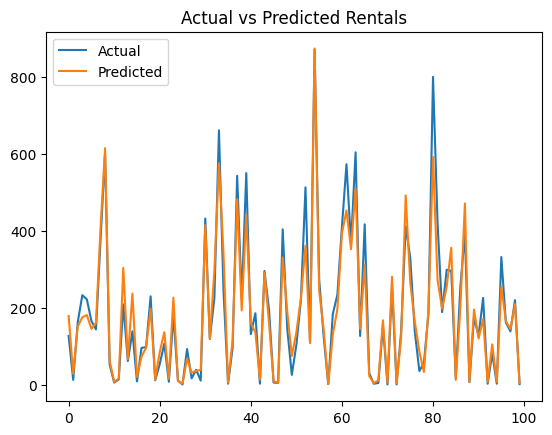

In [12]:
import matplotlib.pyplot as plt

plt.plot(y_test.values[:100], label='Actual')
plt.plot(y_pred[:100], label='Predicted')
plt.legend()
plt.title("Actual vs Predicted Rentals")
plt.savefig("../visuals/prediction_plot.png")
plt.show()


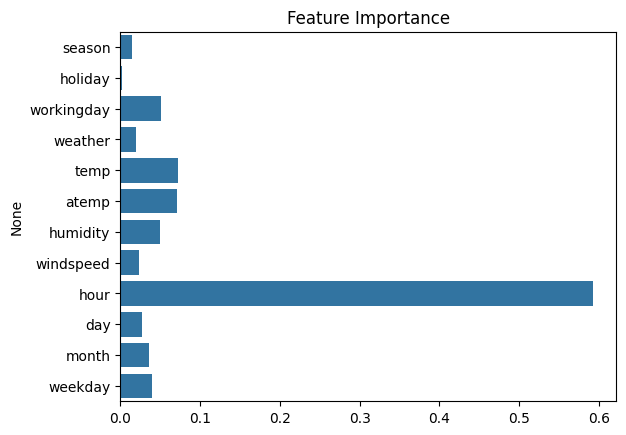

In [13]:
import seaborn as sns

sns.barplot(x=model.feature_importances_, y=X.columns)
plt.title("Feature Importance")
plt.savefig("../visuals/feature_importance.png")
plt.show()
